In [18]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
im_path_spot_2 = '/home/simon/CDE_UBS/thesis/data_collection/spot6/spot6_mosaic.tif'

In [ ]:
infile = im_path_spot_2
coordinates = (
        (279584.5,6792231.5)
    )

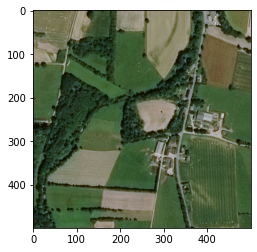

In [25]:
def load_coor_window(path,coordinates,save_file=False):
    
    outfile = "out.tif"

    # Your NxN window
    N = 500

    # Open the raster
    with rasterio.open(infile) as dataset:

        # Loop through your list of coords
        for i, (lon, lat) in enumerate(coordinates):

            # Get pixel coordinates from map coordinates
            py, px = dataset.index(lon, lat)
            #print('Pixel Y, X coords: {}, {}'.format(py, px))

            # Build an NxN window (centered)
            window = rasterio.windows.Window(px - N//2, py - N//2, N, N)
            #print(window)

            # Read the data in the window
            # clip is a nbands * N * N numpy array
            clip = dataset.read(window=window)

            if save_file:
                # Set Meta of new file
                meta = dataset.meta
                meta['width'], meta['height'] = N, N
                meta['transform'] = rasterio.windows.transform(window, dataset.transform)

                with rasterio.open(outfile.format(i), 'w', **meta) as dst:
                    dst.write(clip)
    return(clip)

# display image test
plt.show(plt.imshow(np.transpose(load_coor_window(infile,coordinates), (1, 2, 0))))